In [1]:
import sys
sys.path.append('..')

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from skimage import io, transform

from michaelmendoza_ssfp.phantoms import shepp_logan

In [2]:
tissue_map = {
    'water': [4, 2],
    'white-matter': [0.6, 0.08],
    'gray-matter': [0.9, 0.1],
    'muscle': [0.9, .05],
    'liver': [0.5, 0.04],
    'fat': [0.25, 0.07],
    'tendon': [0.4, 0.005],
    'proteins': [0.250, 0.001]
}

In [3]:
width = 256
height = 256
mask = np.zeros((width, height))

keys = list(tissue_map.keys())

s = (64, 64)
mask = np.block([[np.ones(s) * 0, np.ones(s) * 1, np.ones(s) * 2, np.ones(s) * 3],
                 [np.ones(s) * 4, np.ones(s) * 5, np.ones(s) * 6, np.ones(s) * 7]]).astype(int)
size = mask.shape

t1 = list(map(lambda x: tissue_map[keys[x]][0], mask.flatten()))
t1 = np.array(t1).reshape(mask.shape)

t2 = list(map(lambda x: tissue_map[keys[x]][1], mask.flatten()))
t2 = np.array(t1).reshape(mask.shape)

f0 = 300
f = np.linspace(-f0, f0, size[1])
f = np.tile(f, (size[0], 1))

phantom = {'t1':t1, 't2':t2, 'fo':f}

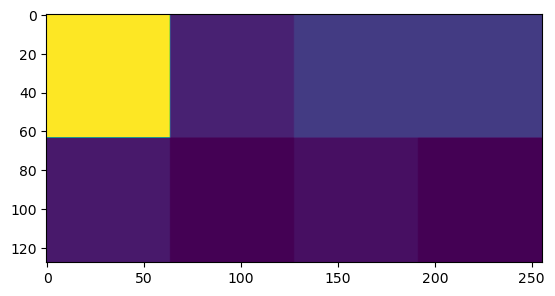

In [4]:
plt.imshow(t1)

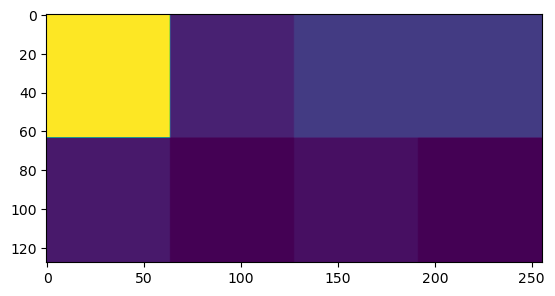

In [5]:
plt.imshow(t2)

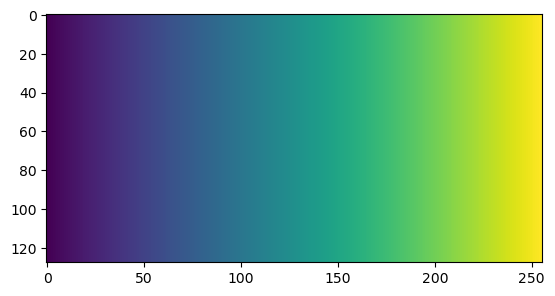

In [6]:
plt.imshow(f)

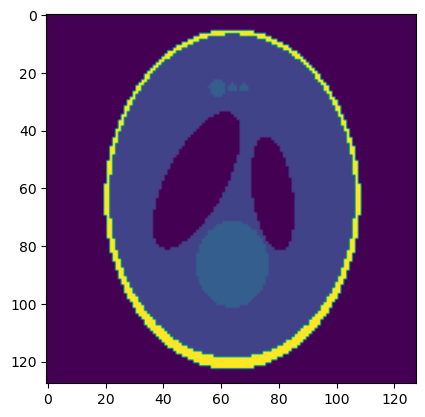

In [7]:
phantom = shepp_logan(128)
phantom.shape
plt.imshow(phantom)
plt.show()